In [1]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'H:\Sandeep\DATA SCIENCE\MY Files\Time series\train.csv')
train

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [3]:
train.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [4]:
test=pd.read_csv(r'H:\Sandeep\DATA SCIENCE\MY Files\Time series\test.csv')
test

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques
...,...,...,...,...,...
17515,87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
17516,87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
17517,87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
17518,87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book


In [5]:
test.isna().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

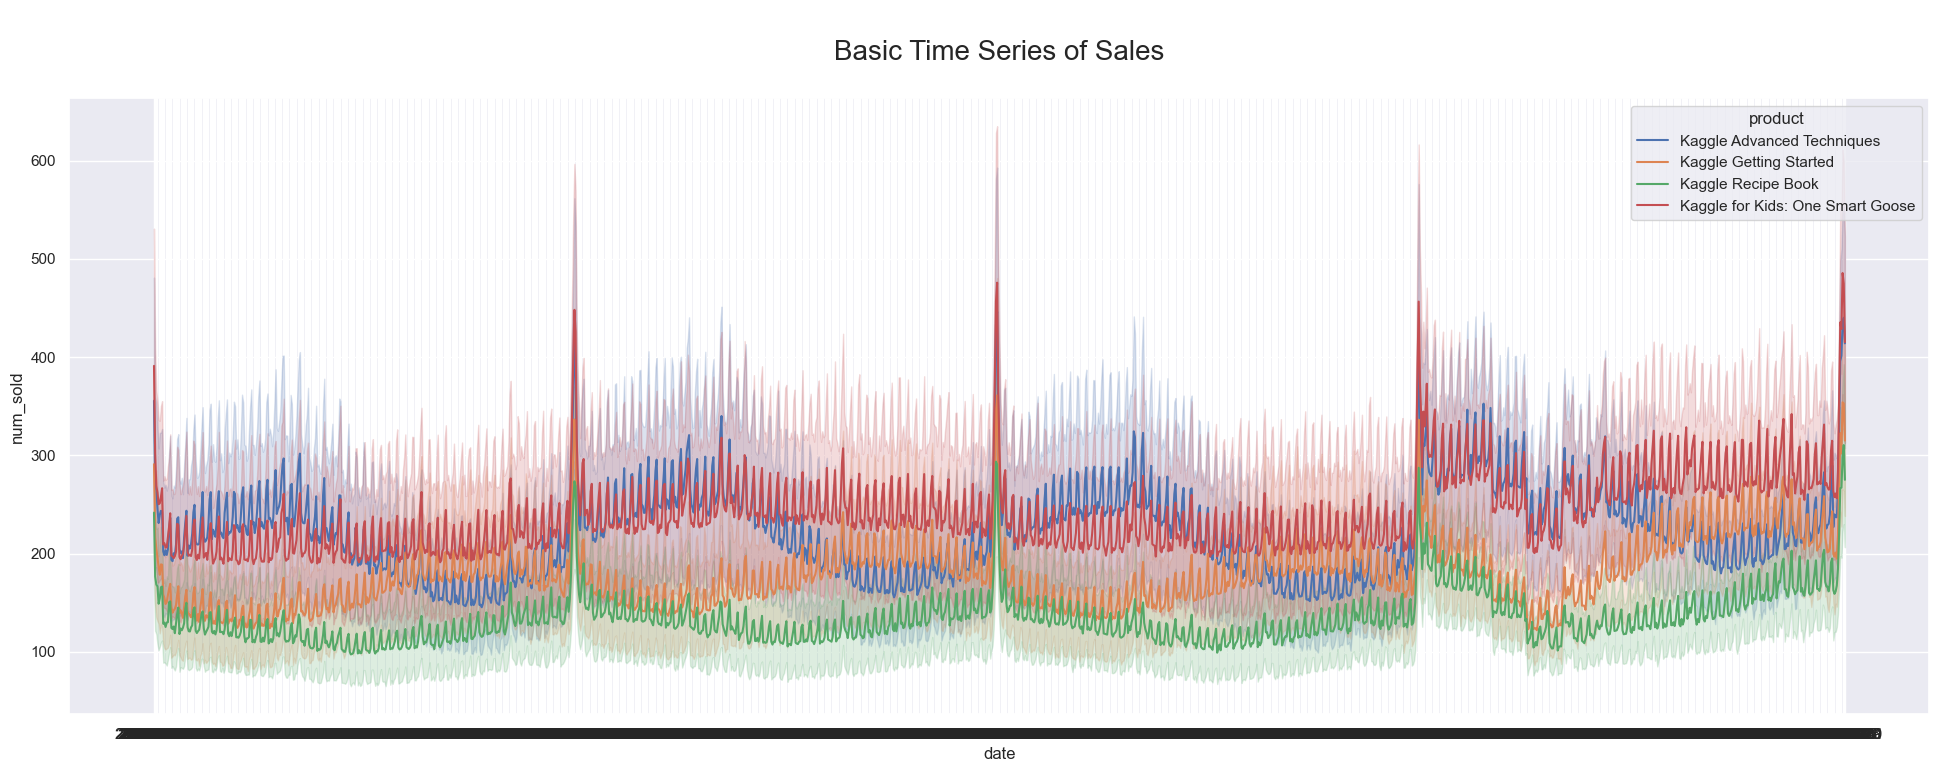

In [6]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=train,x='date',y='num_sold',hue='product')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

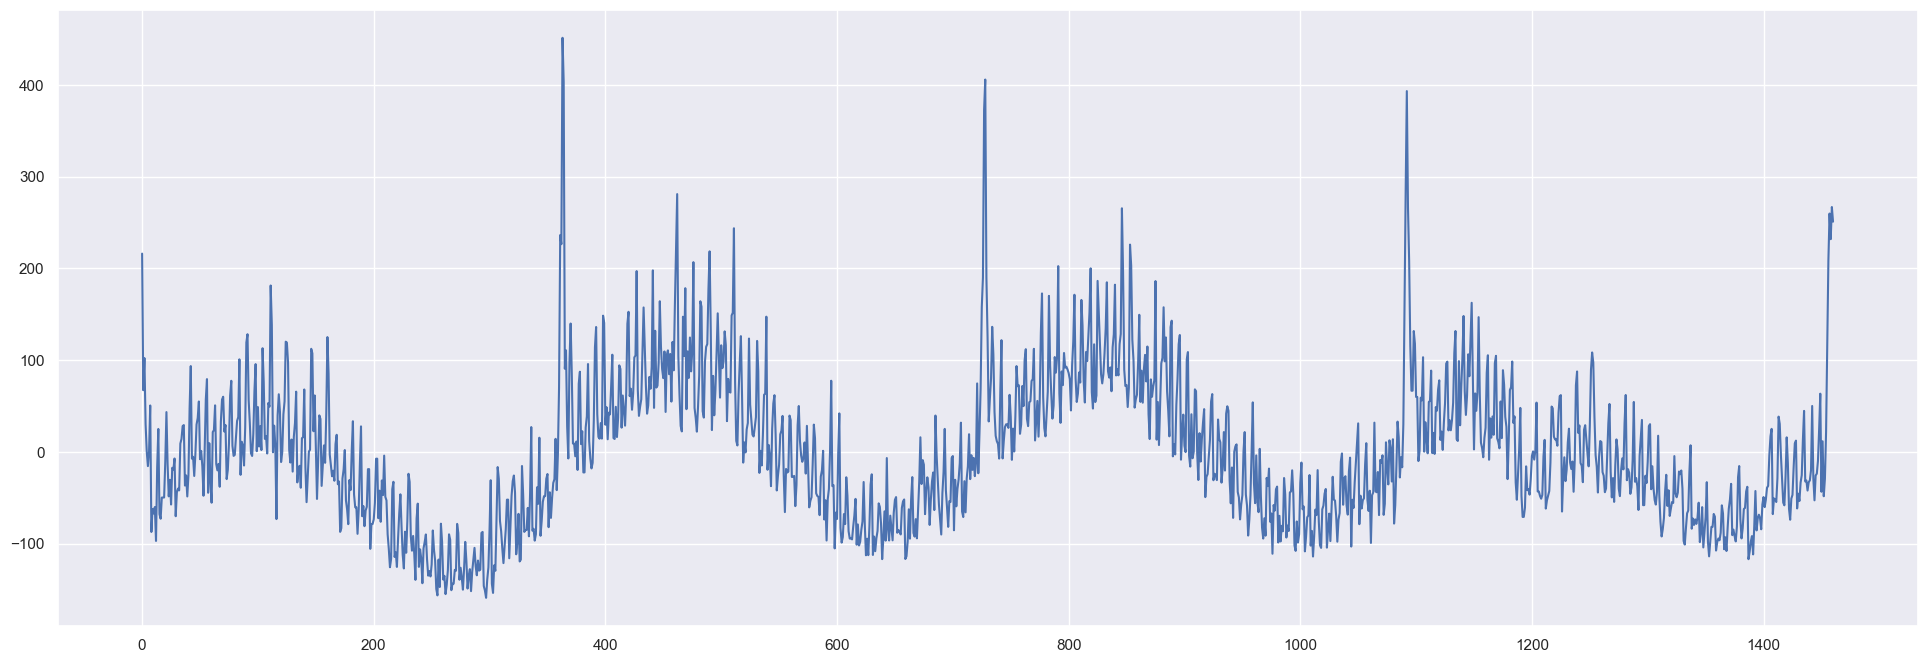

In [7]:
from scipy import signal
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
detrended=signal.detrend(df.num_sold.values)
plt.plot(detrended)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 70080
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    1461 non-null   int64 
 1   date      1461 non-null   object
 2   country   1461 non-null   object
 3   store     1461 non-null   object
 4   product   1461 non-null   object
 5   num_sold  1461 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 79.9+ KB


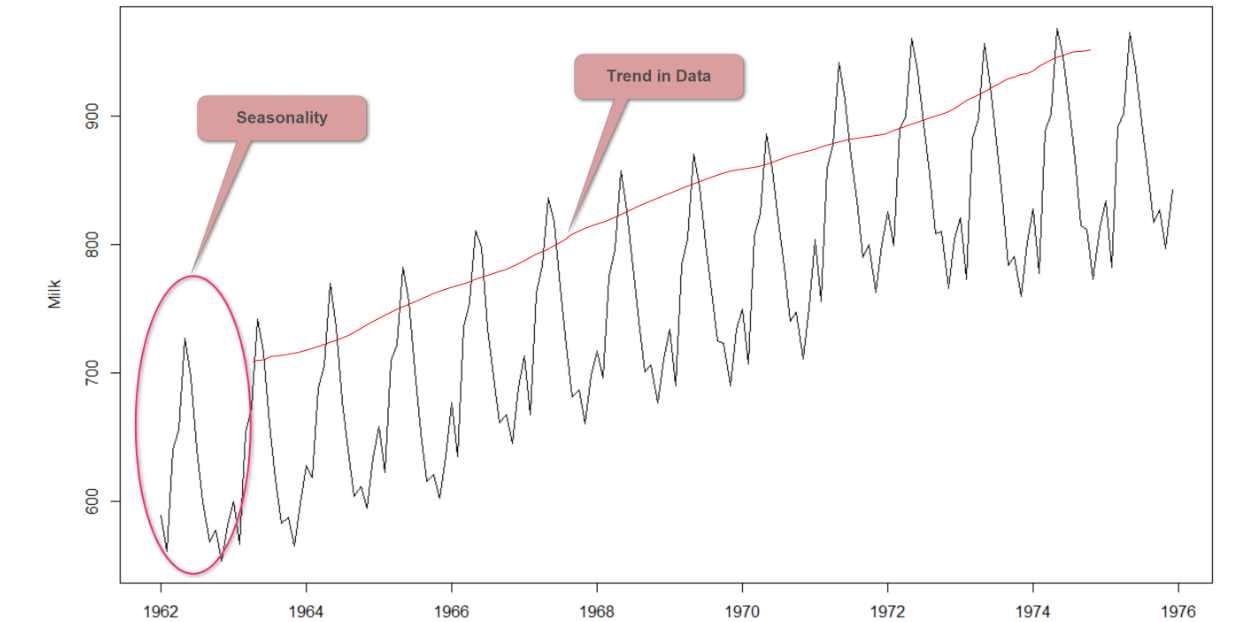

In [9]:
from IPython.display import Image
image1=Image(r'C:\Users\Lenovo\OneDrive\Pictures\Screenshots\Screenshot 2024-04-20 165541.png')
image1

[]

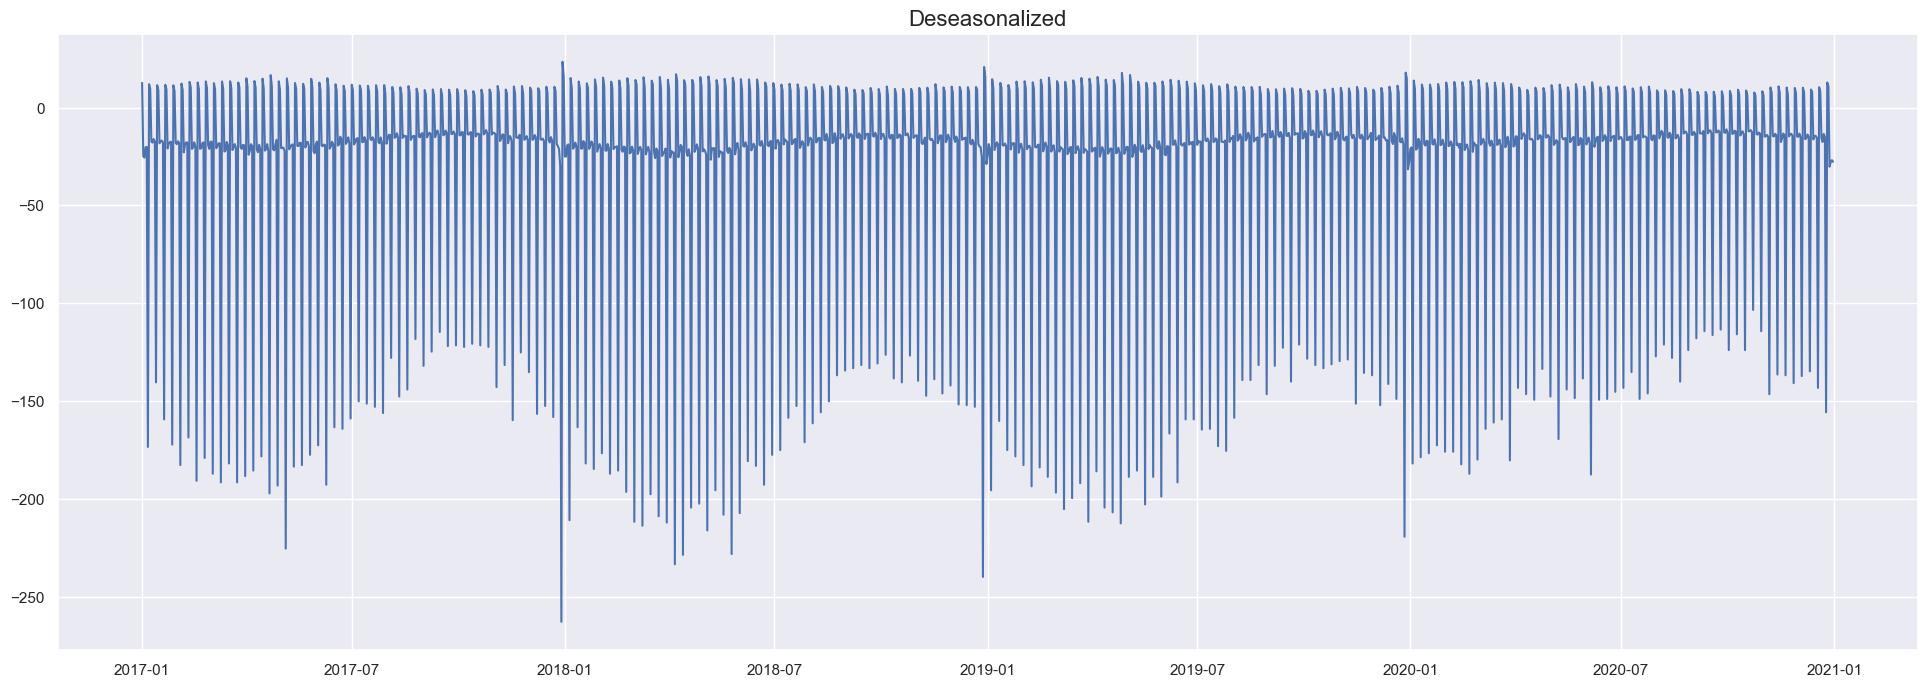

In [10]:
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df=df.set_index('date')
df.index=pd.to_datetime(df.index)
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['num_sold'], model='addtive', extrapolate_trend='freq')
deseasonalized=df.num_sold.values/result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)
plt.plot()

In [11]:
from pandas.plotting import autocorrelation_plot

[]

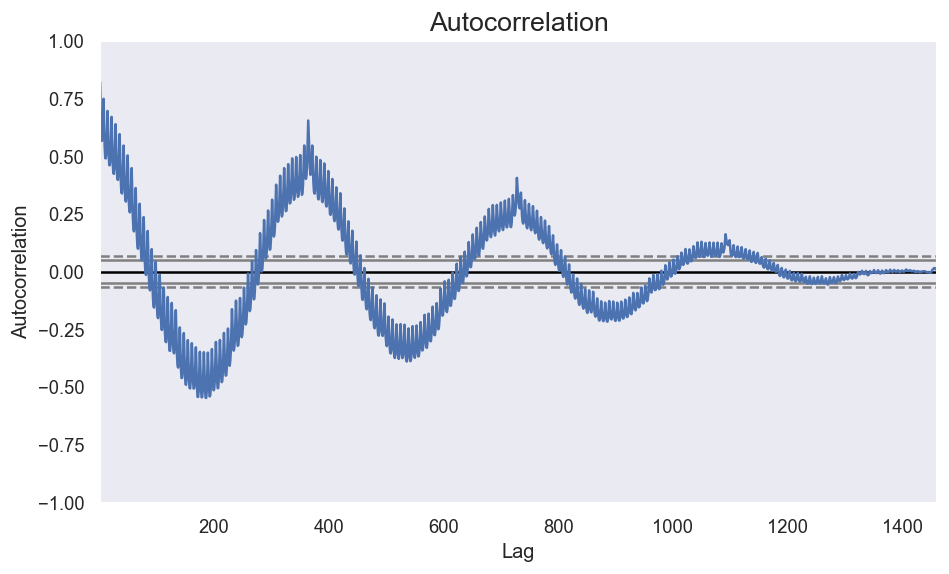

In [12]:
from pandas.plotting import autocorrelation_plot
df = train[(train['country']=='France')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.num_sold.tolist())
plt.title('Autocorrelation', fontsize=16)
plt.plot()

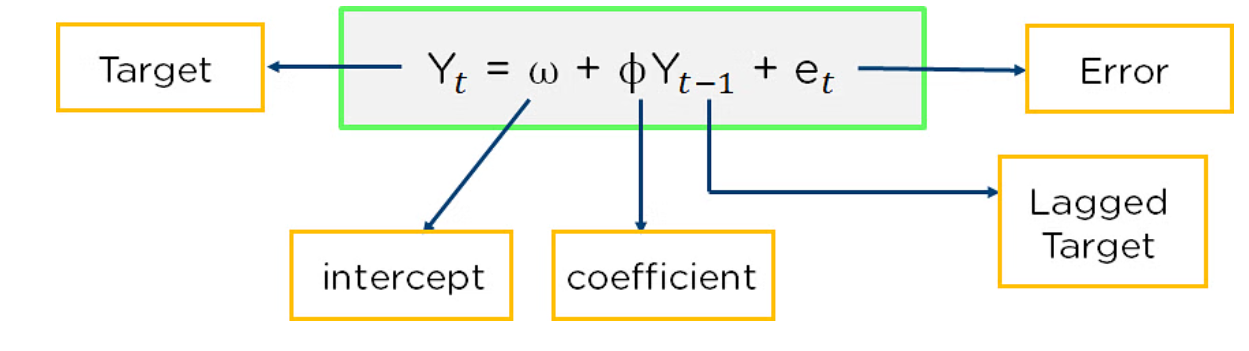

In [13]:
from IPython.display import Image
image2=Image(r'C:\Users\Lenovo\OneDrive\Pictures\Screenshots\Screenshot 2024-04-20 164029.png')
image2

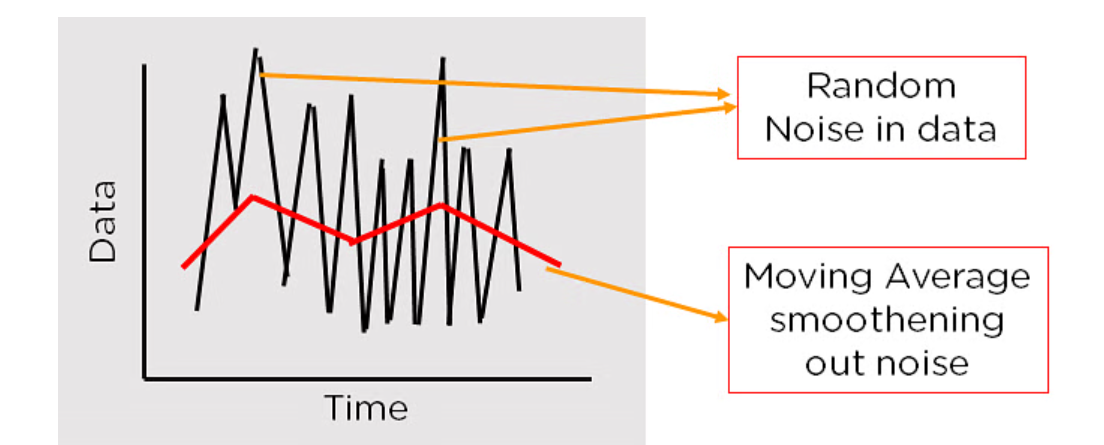

In [14]:
from IPython.display import Image
image3=Image(r'C:\Users\Lenovo\OneDrive\Pictures\Screenshots\Screenshot 2024-04-20 165946.png')
image3

In [15]:
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

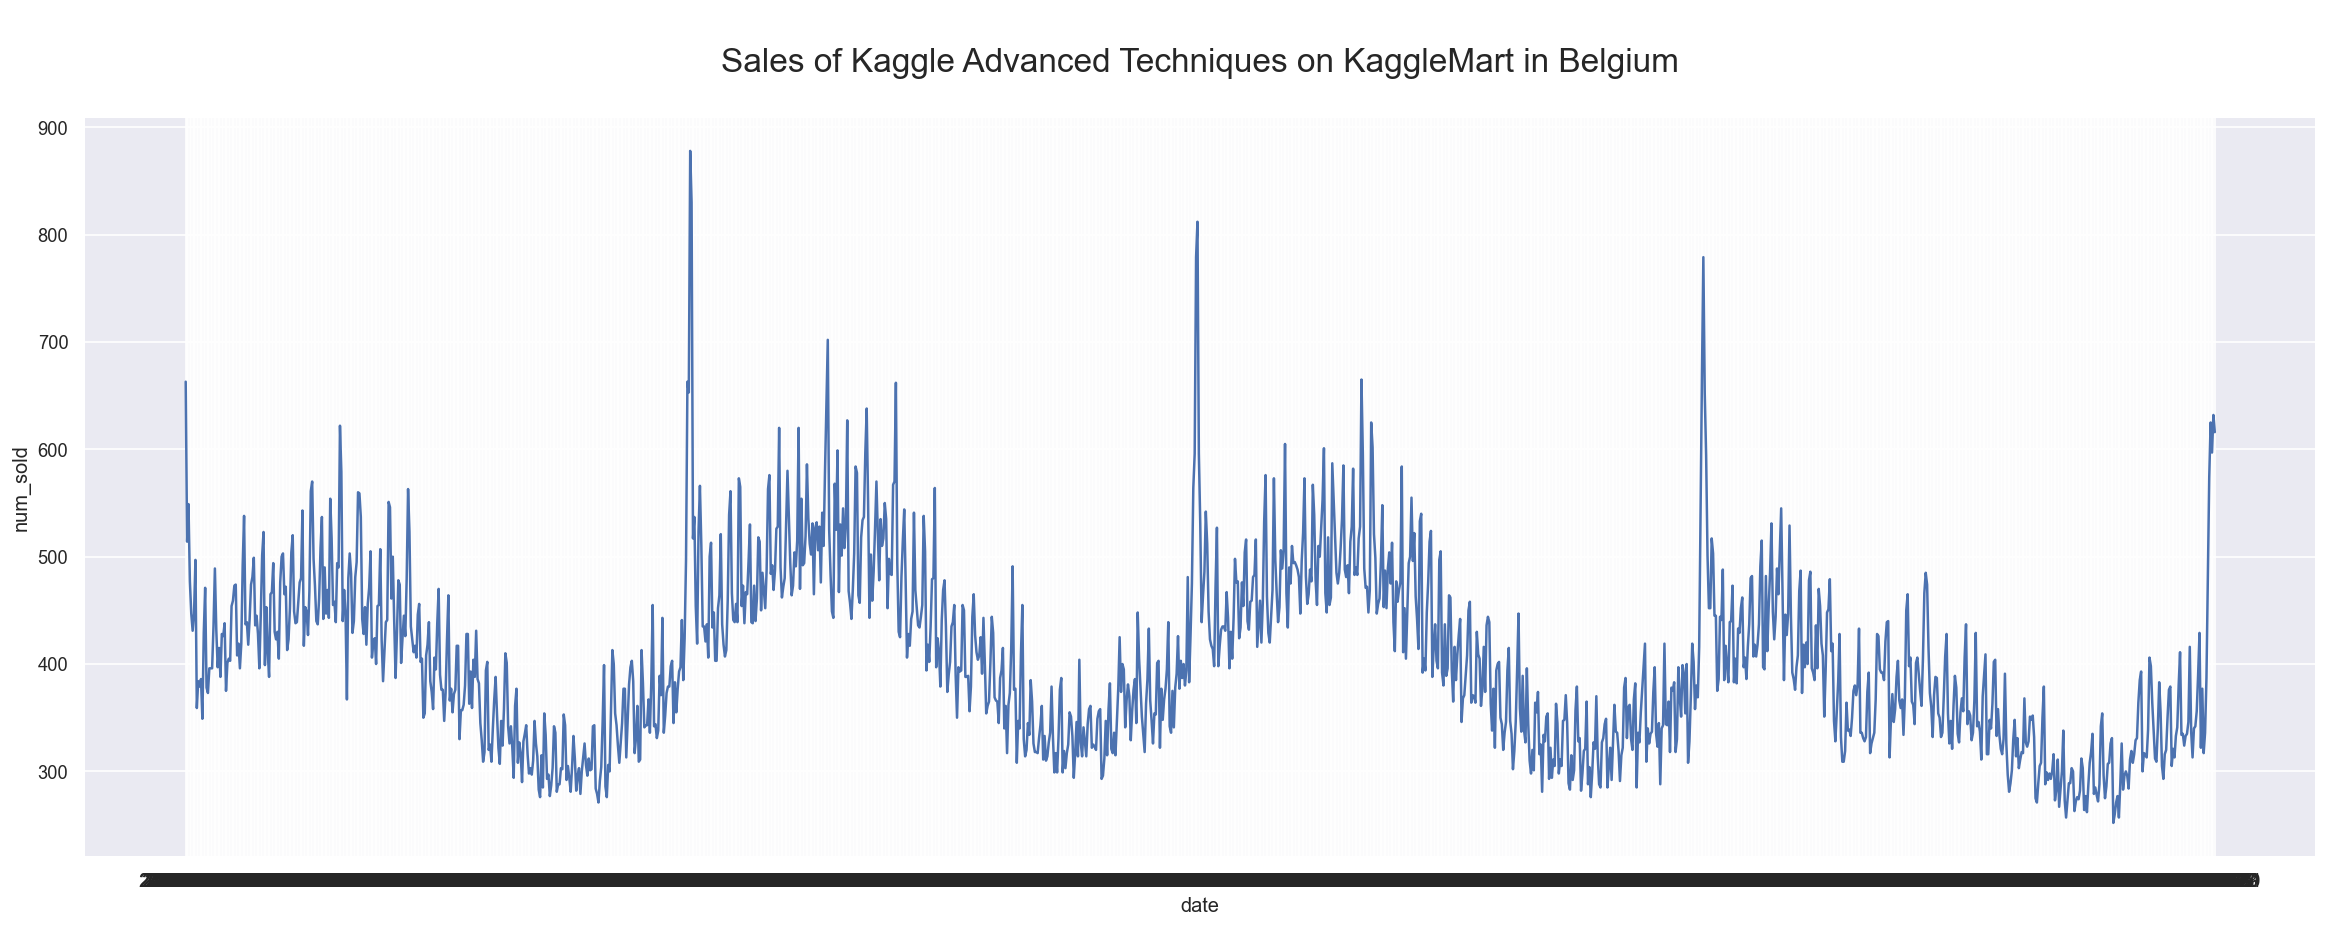

In [16]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='date',y='num_sold')
ax.axes.set_title("\nSales of Kaggle Advanced Techniques on KaggleMart in Belgium\n",fontsize=20);

## Augmented Dickey Fuller test (ADH Test)

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.num_sold.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.71778533590316
p-value: 0.07101086977865106
Critial Values:
   1%, -3.4349056408696814
Critial Values:
   5%, -2.863552005375758
Critial Values:
   10%, -2.5678411776130114


In [18]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import kpss
result = kpss(df.num_sold.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 0.887170
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [19]:
result

(0.8871702070904025,
 0.01,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

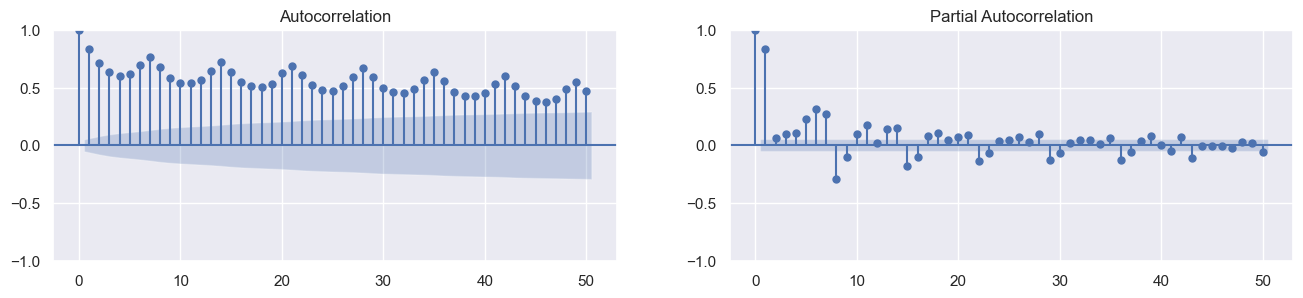

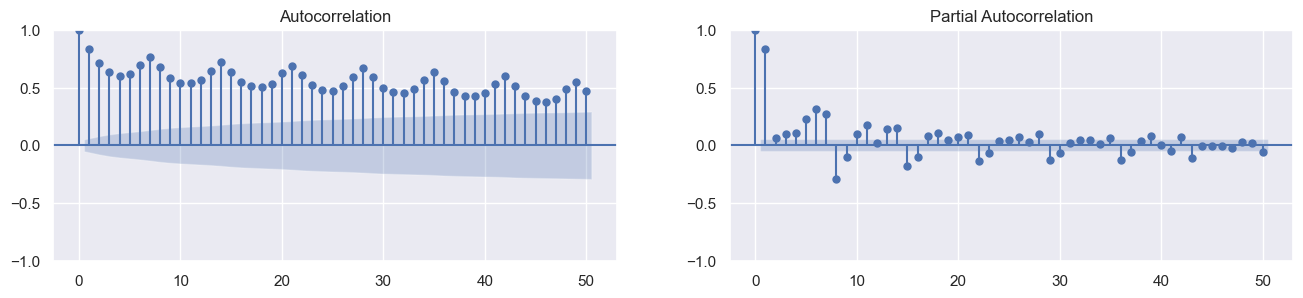

In [21]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df['value']=df['num_sold']

acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

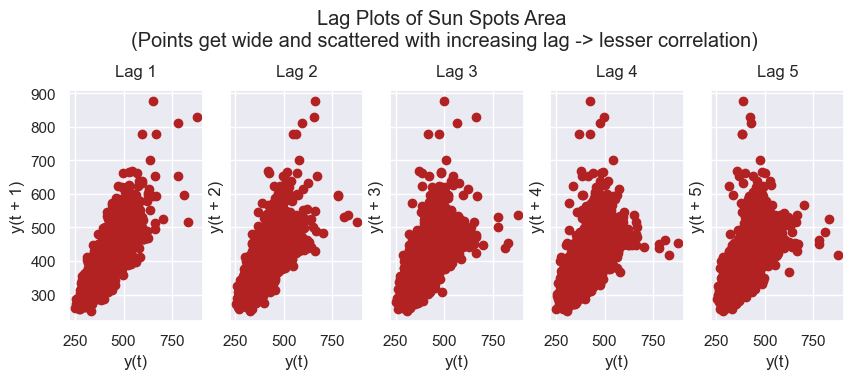

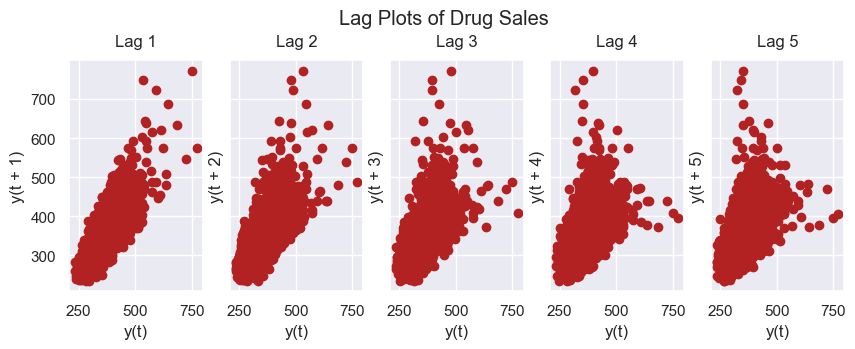

In [37]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
ss = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

ss['value']=ss['num_sold']
a10 = train[(train['country']=='France')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
a10['value']=a10['num_sold']
fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)
fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

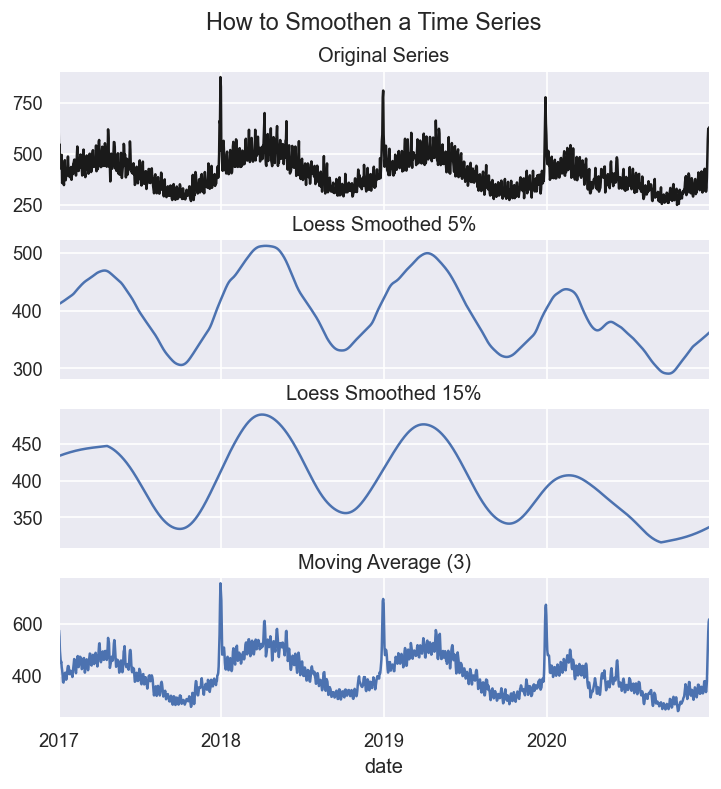

In [39]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
df['value']=df['num_sold']
df=df.set_index('date')
df.index = pd.to_datetime(df.index)

df_orig=df.copy()

df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()


df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

In [40]:
df = train[(train['country']=='Belgium')&(train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]
series=pd.DataFrame()
series['value']=df['num_sold']
series=series.set_index(df['date'])
series.index = pd.to_datetime(series.index)

series

,value
date,
2017-01-01,663
2017-01-02,514
2017-01-03,549
2017-01-04,477
2017-01-05,447
...,...
2020-12-27,574
2020-12-28,625
2020-12-29,597


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 1461
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7515.898
Date:                Mon, 22 Apr 2024   AIC                          15043.797
Time:                        15:02:38   BIC                          15075.514
Sample:                    01-01-2017   HQIC                         15055.628
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.020    -16.123      0.000      -0.358      -0.280
ar.L2         -0.3069      0.016    -18.621      0.000      -0.339      -0.275
ar.L3         -0.2861      0.023    -12.613      0.0

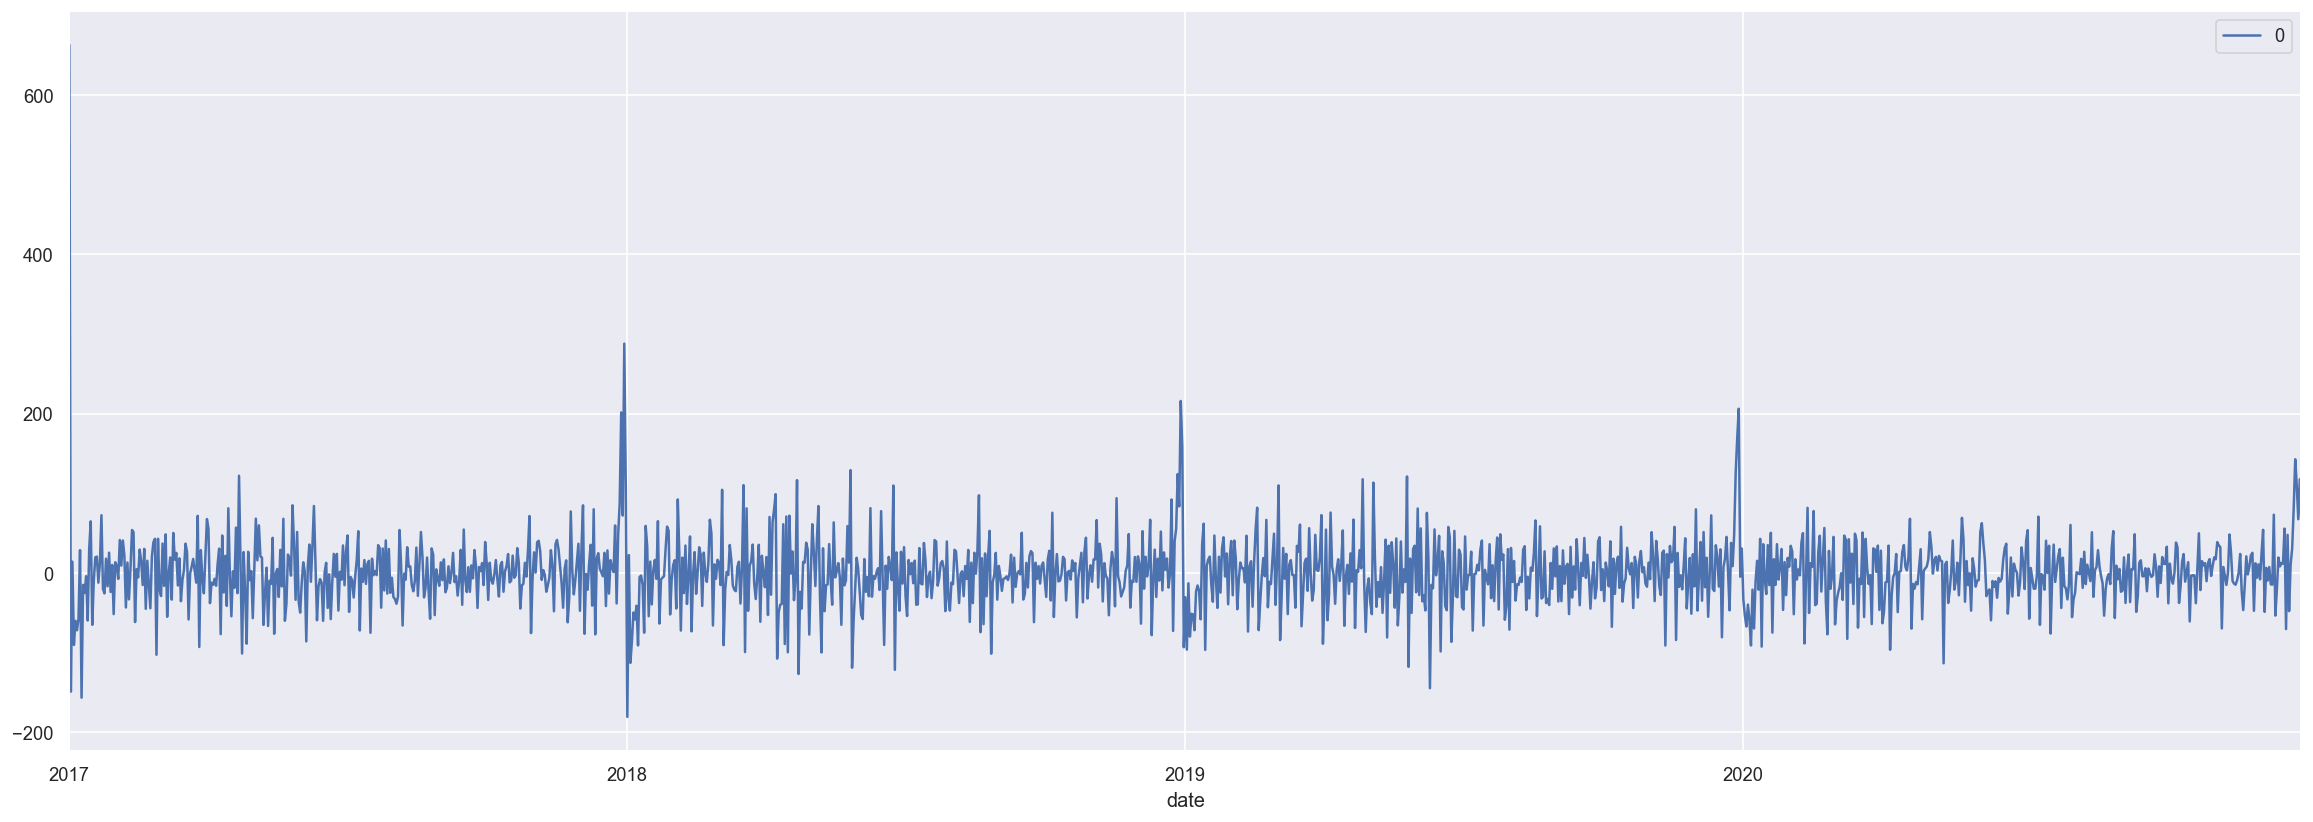

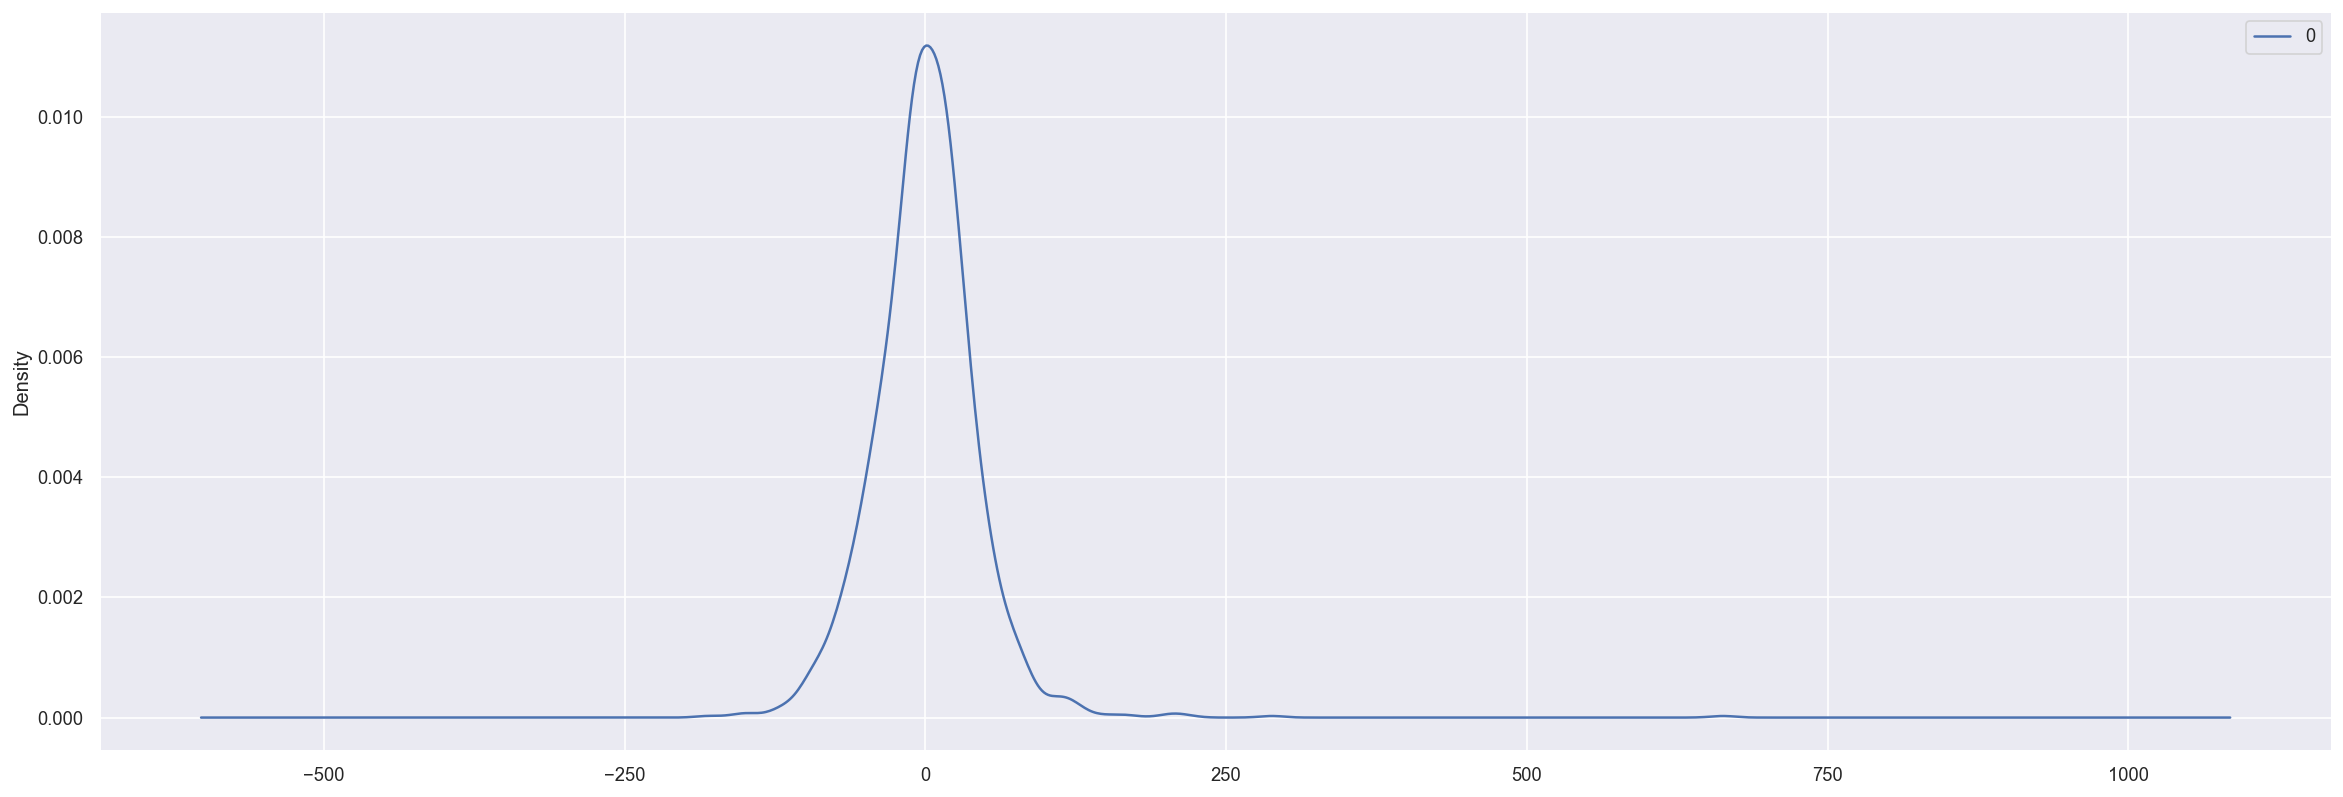

                 0
count  1461.000000
mean      0.388641
std      45.151376
min    -180.506780
25%     -23.286515
50%       0.017558
75%      23.277978
max     663.000000


In [43]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())

In [45]:
residuals,series

(                     0
 date                  
 2017-01-01  663.000000
 2017-01-02 -148.790421
 2017-01-03   14.341309
 2017-01-04  -90.235736
 2017-01-05  -59.861808
 ...                ...
 2020-12-27  142.858464
 2020-12-28  110.320599
 2020-12-29   67.655764
 2020-12-30  117.761311
 2020-12-31   64.904007
 
 [1461 rows x 1 columns],
             value
 date             
 2017-01-01    663
 2017-01-02    514
 2017-01-03    549
 2017-01-04    477
 2017-01-05    447
 ...           ...
 2020-12-27    574
 2020-12-28    625
 2020-12-29    597
 2020-12-30    632
 2020-12-31    616
 
 [1461 rows x 1 columns])

In [57]:
y = series['value']
y

date
2017-01-01    663
2017-01-02    514
2017-01-03    549
2017-01-04    477
2017-01-05    447
             ... 
2020-12-27    574
2020-12-28    625
2020-12-29    597
2020-12-30    632
2020-12-31    616
Name: value, Length: 1461, dtype: int64

In [62]:
m=model_fit.predict(start=series.index[0],end=series.index[-1])

In [63]:
m

2017-01-01      0.000000
2017-01-02    662.790421
2017-01-03    534.658691
2017-01-04    567.235736
2017-01-05    506.861808
                 ...    
2020-12-27    431.141536
2020-12-28    514.679401
2020-12-29    529.344236
2020-12-30    514.238689
2020-12-31    551.095993
Freq: D, Name: predicted_mean, Length: 1461, dtype: float64

In [68]:
from sklearn.metrics import r2_score
r2_scorE=r2_score(m,series)

In [69]:
r2_scorE

0.6591894981200983